# Corruptos y honestos

Una población de agentes que pueden ser corruptos u honestos.

Justo antes de interactuar con otros agentes usan su experiencia para establecer su estado. Si no tienen experiencia eligen al azar.

Cada interacción les suma el valor de la función de utilidad. Con la matriz configurada como el dilema del prisionero, las utilidades son siempre negativas, se gana pasando menos tiempo en prisión.

Tras cada interacción acumulan experiencia, o sea: recuerdan los estados de los agentes con los que van interactuando.

In [1]:
import random

class Agente:
    """ Esta clase define los agentes"""
    
    def __init__(self):
        """ constructor de la clase, establece los rasgos del agente"""
        self.experiencia = []
        self.utilidad = 0
        self.actualiza_estado()
    
    def actualiza_estado(self):
        """ actualiza el estado del agente con base en su experiencia"""
        if self.experiencia:
            self.estado = random.choice(self.experiencia)
        else:
            self.estado = random.choice(['honesto', 'corrupto'])
            

La interacción entre dos agentes está dada por el Dilema del Prisionero.

In [2]:
def interaccion(a, b):
    if (a.estado == 'honesto'
        and b.estado == 'honesto'):
        a.utilidad += -1
        b.utilidad += -1
    elif (a.estado == 'honesto'
         and b.estado == 'corrupto'):
        a.utilidad += -3
        b.utilidad += 0
    elif (a.estado == 'corrupto'
         and b.estado == 'honesto'):
        a.utilidad += 0
        b.utilidad += -3
    elif (a.estado == 'corrupto'
         and b.estado == 'corrupto'):
        a.utilidad += -2
        b.utilidad += -2
        
    # la interacción le da experiencia a los agentes
    a.experiencia.append(b.estado)
    b.experiencia.append(a.estado)


## Ejemplo con dos agentes

Examinemos a un par de agentes, A y B.

In [3]:
A = Agente()
B = Agente()

# El constructor de la clase Agente invoca actualizar_estado(), que
# establece su estado al azar pues no tiene experiencia. Para esta 
# prueba establecemos manualmente su estado como honestos justo 
# antes de interactuar.

A.estado = 'honesto'
B.estado = 'honesto'

interaccion(A, B)

# De acuerdo con la matriz de pago, tras la interacción 
# cada uno tiene utilidad de -1
A.utilidad, B.utilidad

(-1, -1)

In [4]:
# Y la experiencia de ambos es una lista de un sólo 
# elemento, pues sólo han interactuado una vez.
A.experiencia, B.experiencia

(['honesto'], ['honesto'])

In [5]:
# Otra interacción muestra cómo los agentes acumulan utilidad
# y experiencia.

A.estado = 'honesto'
B.estado = 'corrupto'

interaccion(A, B)

A.experiencia, A.utilidad, B.experiencia, B.utilidad

(['honesto', 'corrupto'], -4, ['honesto', 'honesto'], -1)

In [6]:
# Aqui un agente que ha tenido muy malas experiencias:
A.experiencia = ['corrupto', 'honesto', 'corrupto', 'corrupto']

# A diferencia de ejemplos previos en los que establecíamos
# arbitrariamente el estado, acá dejamos que el agente actualice
# con base en su experiencia.
A.actualiza_estado()

A.estado

'corrupto'

## Experimento con una población de agentes

¿Cuál es el estado global del sistema (corrupto u honesto)?

In [7]:
# una población de 100 agentes
N = 100
# simularemos 1000 iteraciones
iteraciones = 1000

# creamos N agentes
agentes = [Agente() for n in range(N)]

# proporción de corruptos/honestos
honestos = [0 for n in range(iteraciones)]  

# utilidades de agentes por t
u = [0 for n in range(iteraciones)] 

for t in range(iteraciones):
    # interactua un par cualquiera por cada t
    A, B = random.sample(agentes, 2)

    A.actualiza_estado()
    B.actualiza_estado()
    
    interaccion(A, B)
        
    # registra honestos por t
    honestos[t] = len([a for a in agentes if a.estado == 'honesto'])
    
    # guarda la utilidad de cada agente en t
    u[t] = ([a.utilidad for a in agentes])


Text(0,0.5,u'honestos')

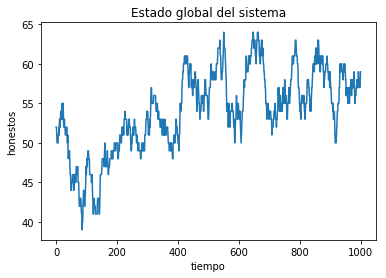

In [8]:
# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

plt.plot(honestos)
plt.title('Estado global del sistema')
plt.xlabel('tiempo')
plt.ylabel('honestos')

Text(0,0.5,u'utilidad')

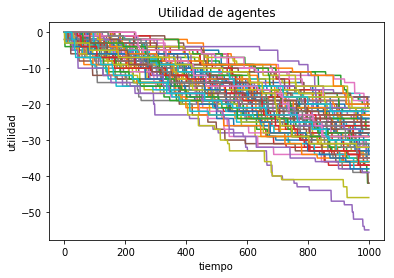

In [9]:
fig = plt.plot(u)
plt.title('Utilidad de agentes')
plt.xlabel('tiempo')
plt.ylabel('utilidad')

# Interacciones vigiladas

Ahora supongamos que hay una densidad inicial de agentes encubiertos incorruptibles, que cuando interactúan con un corrupto, lo encarcelan.

Si son agentes encubiertos su estado siempre es ser honestos. 

Las preferencias de los agentes cambian dependiendo de cuántos agentes con los que quieren interactuar están en la cárcel, de tal manera que si alcanzan un límite, prefieren ser honestos. Este parámetro se llama "ejemplo_persuasivo" y es un atributo de cada agente.

In [10]:
class Agente:
    
    def __init__(self):
        # atributos para la vigilancia
        self.encubierto = False
        self.encarcelado = False
        self.visto_encarcelados = 0
        self.ejemplo_persuasivo = 2

        self.utilidad = 0
        self.experiencia = []
        self.actualiza_estado()
    
    def actualiza_estado(self):
        if self.encubierto:
            self.estado = 'honesto'
        elif self.visto_encarcelados >= self.ejemplo_persuasivo:
            self.estado = 'honesto'
        elif self.experiencia:
            self.estado = random.choice(self.experiencia)
        else:
            self.estado = random.choice(['honesto', 'corrupto'])
            

In [11]:
def interaccion_vigilada(a, b):

    # agentes encubiertos patrullan
    if a.encubierto:
        if b.estado == 'corrupto':
            b.encarcelado = True

    if b.encubierto:
        if a.estado == 'corrupto':
            a.encarcelado = True
            
    # ver que los dos sean libres
    libres = True
    
    # agentes cuentan ejemplos de encarcelamientos
    if a.encarcelado:
        b.visto_encarcelados += 1
        libres = False
        
    if b.encarcelado:
        a.visto_encarcelados += 1
        libres = False
        
    # sólo agentes libres interactuan
    if libres:
        # mismo dilema del prisionero
        if (a.estado == 'honesto'
            and b.estado == 'honesto'):
            a.utilidad += -1
            b.utilidad += -1
        elif (a.estado == 'honesto'
             and b.estado == 'corrupto'):
            a.utilidad += -3
            b.utilidad += 0
        elif (a.estado == 'corrupto'
             and b.estado == 'honesto'):
            a.utilidad += 0
            b.utilidad += -3
        elif (a.estado == 'corrupto'
             and b.estado == 'corrupto'):
            a.utilidad += -2
            b.utilidad += -2
            
        a.experiencia.append(b.estado)
        b.experiencia.append(a.estado)

## Experimento con un encubierto
Para que una población de 100 agentes sea mayormente honesta ¿cuál es la densidad mínima de honestos incorruptibles, si los agentes tienen ejemplo persuasivo de 2 encarcelados?

In [12]:
N = 100
# dos encubiertos por cada 100
encubiertos = 1
iteraciones = 1000

# creamos N agentes
agentes = [Agente() for n in range(N)]

# reclutamos encubiertos
for n in range(encubiertos):
    agentes[n].encubierto = True

honestos = [0 for n in range(iteraciones)]
u = [0 for n in range(iteraciones)]
# para contar agentes no encarcelados en la población
libres = [0 for n in range(iteraciones)]  

for t in range(iteraciones):

    # interactua un par cualquiera
    A, B = random.sample(agentes, 2)

    A.actualiza_estado()
    B.actualiza_estado()
    interaccion_vigilada(A, B)
        
    # cuenta por estado
    honestos[t] = len([a for a in agentes if a.estado == 'honesto'])
    u[t] = [a.utilidad for a in agentes]
    libres[t] = len([a for a in agentes if a.encarcelado == False])


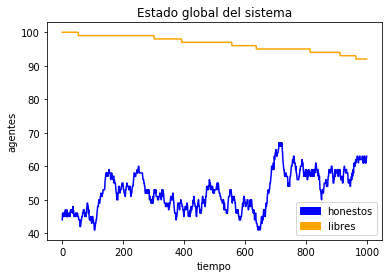

In [13]:
plt.plot(honestos, color='blue')
plt.plot(libres, color='orange')
plt.title('Estado global del sistema')
plt.xlabel('tiempo')
plt.ylabel('agentes')
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='honestos')
orange_patch = mpatches.Patch(color='orange', label='libres')
plt.legend(handles=[blue_patch, orange_patch])


Un sólo agente encubierto parece bastar para que más de la mitad de la población se vuelva honesta.

Text(0,0.5,u'utilidad')

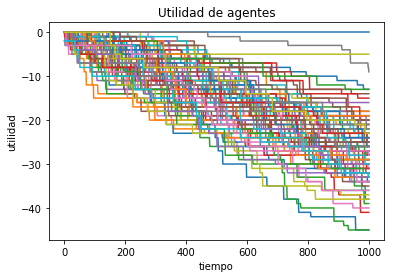

In [14]:
fig = plt.plot(u)
plt.title('Utilidad de agentes')
plt.xlabel('tiempo')
plt.ylabel('utilidad')

Las utilidades se parecen bastante a las del modelo sin encubiertos.

## Experimento con diez encubiertos

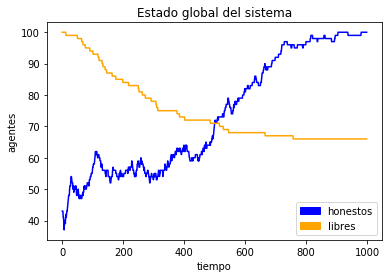

In [15]:
N = 100
# diez encubiertos por cada 100
encubiertos = 10
iteraciones = 1000

# creamos N agentes
agentes = [Agente() for n in range(N)]

# reclutamos encubiertos
for n in range(encubiertos):
    agentes[n].encubierto = True

honestos = [0 for n in range(iteraciones)]
u = [0 for n in range(iteraciones)]
# para contar agentes no encarcelados en la población
libres = [0 for n in range(iteraciones)]  

for t in range(iteraciones):

    # interactua un par cualquiera
    A, B = random.sample(agentes, 2)

    A.actualiza_estado()
    B.actualiza_estado()
    interaccion_vigilada(A, B)
        
    # cuenta por estado
    honestos[t] = len([a for a in agentes if a.estado == 'honesto'])
    u[t] = [a.utilidad for a in agentes]
    libres[t] = len([a for a in agentes if a.encarcelado == False])

    
plt.plot(honestos, color='blue')
plt.plot(libres, color='orange')
plt.title('Estado global del sistema')
plt.xlabel('tiempo')
plt.ylabel('agentes')
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='honestos')
orange_patch = mpatches.Patch(color='orange', label='libres')
plt.legend(handles=[blue_patch, orange_patch])


Text(0,0.5,u'utilidad')

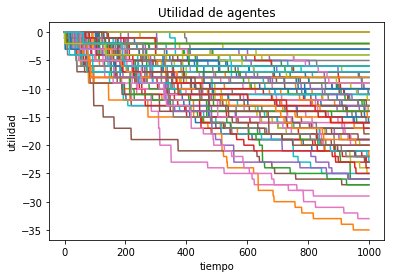

In [16]:
fig = plt.plot(u)
plt.title('Utilidad de agentes')
plt.xlabel('tiempo')
plt.ylabel('utilidad')

La condena más larga es de la mitad que en los dos modelos anteriores.

## Experimento con otro ejemplo persuasivo

Si los agentes son escépticos de la ley necesitan ver más ejemplos de encarcelamientos antes de persuadirse de ser honestos.

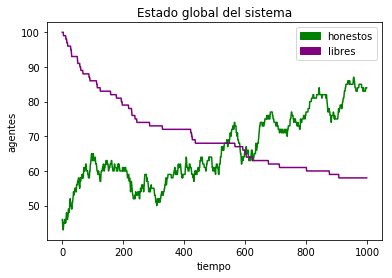

In [17]:
N = 100
# diez encubiertos por cada 100
encubiertos = 10
iteraciones = 1000

# creamos N agentes
agentes = [Agente() for n in range(N)]

# les damos un ejemplo persuasivo de 5
for n in range(N):
    agentes[n].ejemplo_persuasivo = 5

# reclutamos encubiertos
for n in range(encubiertos):
    agentes[n].encubierto = True

honestos = [0 for n in range(iteraciones)]
u = [0 for n in range(iteraciones)]
# para contar agentes no encarcelados en la población
libres = [0 for n in range(iteraciones)]  

for t in range(iteraciones):

    # interactua un par cualquiera
    A, B = random.sample(agentes, 2)

    A.actualiza_estado()
    B.actualiza_estado()
    interaccion_vigilada(A, B)
        
    # cuenta por estado
    honestos[t] = len([a for a in agentes if a.estado == 'honesto'])
    u[t] = [a.utilidad for a in agentes]
    libres[t] = len([a for a in agentes if a.encarcelado == False])

    
plt.plot(honestos, color='green')
plt.plot(libres, color='purple')
plt.title('Estado global del sistema')
plt.xlabel('tiempo')
plt.ylabel('agentes')
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='honestos')
purple_patch = mpatches.Patch(color='purple', label='libres')
plt.legend(handles=[green_patch, purple_patch])


Una proporción sustancial de la población termina encarcelada, por incrédula.